## SHAP / LIME

https://github.com/shap/shap

As for Shapley value, you can find an article [here](https://h2o.ai/blog/2022/shapley-values-a-gentle-introduction/), or an online book [here](https://christophm.github.io/interpretable-ml-book/shapley.html). You can find a rigorous definition of the value [here](https://en.wikipedia.org/wiki/Shapley_value).

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


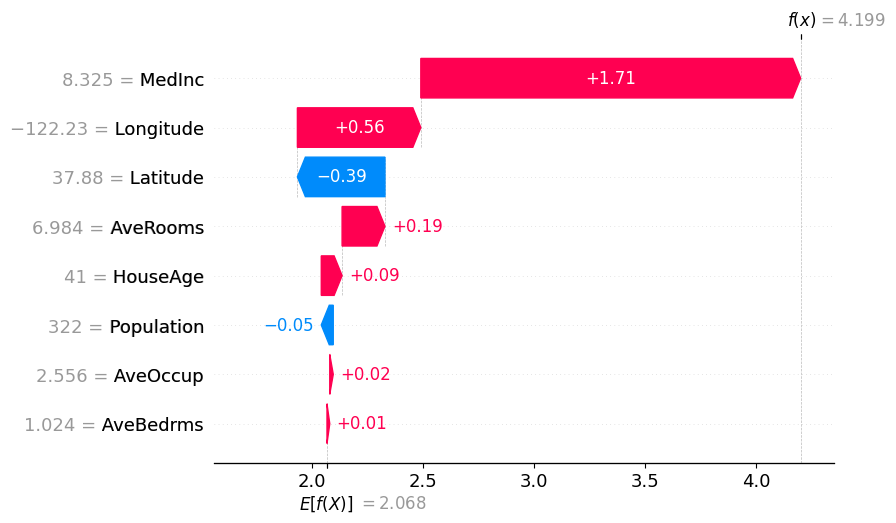

In [2]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.california()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [3]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

In [4]:
# visualize all the training set predictions
shap.initjs()
shap.plots.force(shap_values[:500])

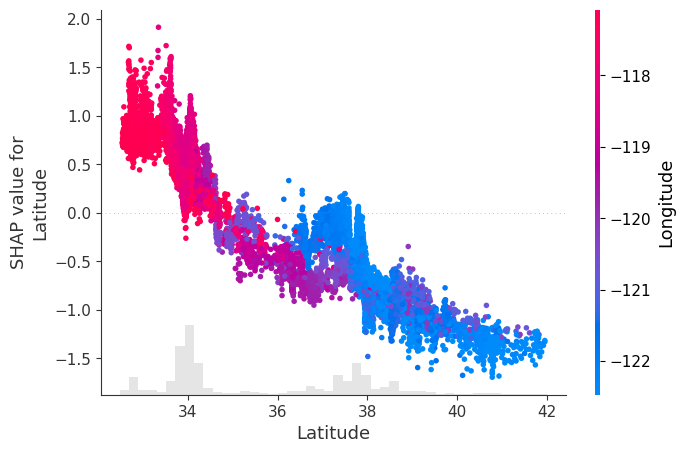

In [5]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)

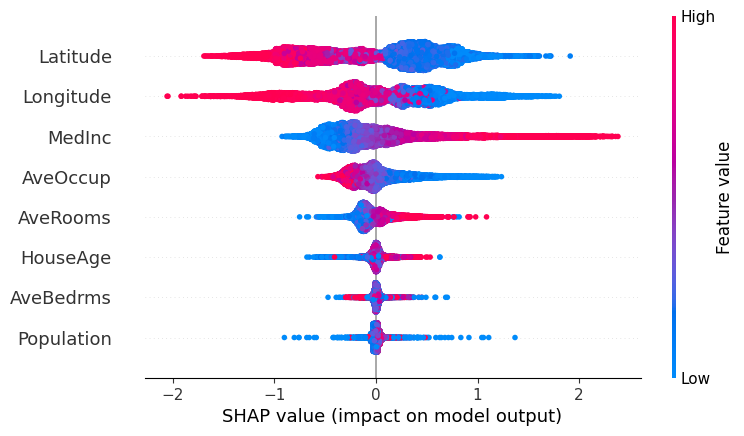

In [6]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

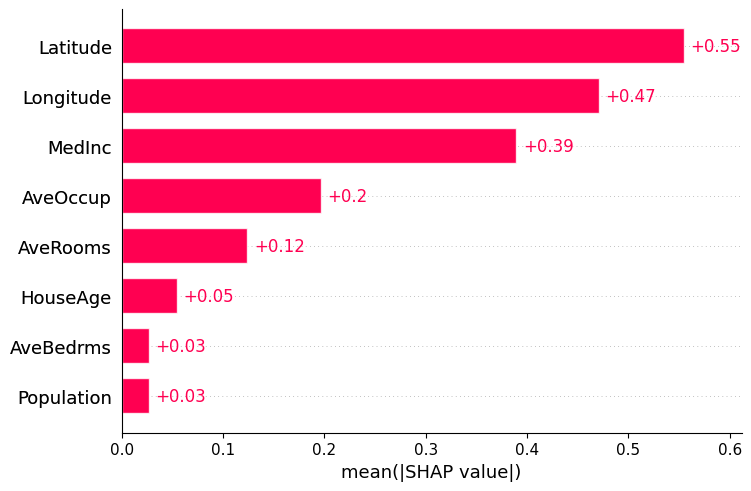

In [7]:
shap.plots.bar(shap_values)